In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pathlib import Path
import scipy.io as sio
plt.rcParams["figure.figsize"] = (11.69,8.27)
plt.rc('lines', linewidth=2)
plt.rc('legend',fontsize=20) # using a size in points
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

## Load data

nx = 288
ny = 288
nz = 385
zps = 328
npcon =20
recl = nx*ny*nz
z = np.linspace(0,-2.5*(nz-1)/nz,nz)
z = z - z[zps]
dj=6e-3
zd = z/dj
d = np.logspace(np.log10(14e-6),np.log10(3e-3),20)

In [51]:
r = np.load("r.npy")
rh = np.load("r_half.npy")
w = np.load("w_vel_rz.npy")
C1 = np.load("C_1av.npy")
C_2 = np.load("C_2av.npy")

C8 = np.load("C_8av.npy")
C14 = np.load("C_14av.npy")
C16 = np.load("C_16av.npy")

C20 = np.load("C_20av.npy")
C = np.load("C_tot_av.npy")
C2 = np.load('c2_rz_0.npy')

In [ ]:
r_h1 = np.zeros([nz])
r_ch = []
r_half={}
slope={}
fig,ax = plt.subplots()
for ip in range(npcon):
    
    C = np.load('C_'+str(ip+1)+'av.npy')
    for jz in range(nz):
        c_half = C[0,jz]/2
        r_h1[jz] = (np.interp(-c_half,-C[:,jz],r))
    fit = np.polyfit(z[200:zps-40],r_h1[210:zps-30],1)
    ax.plot(zd[180:zps-30],r_h1[180:zps-30])
    r_half['r_h'+str(ip+1)] = r_h1
    slope[str(ip+1)] = fit[0]


plt.savefig('plot.pdf')


In [ ]:
keys = slope.keys()

values = slope.values()

fig,ax = plt.subplots()
plt.semilogx(d*1e-6, values,'o',ms=5,mec='g',mfc='g')
plt.xlabel('$d (m)$')
plt.ylabel('$S$')
plt.ylim([0,.12])
ax.tick_params(axis='y',labelsize=22)
ax.tick_params(axis='x',labelsize=22)
plt.savefig("conc_decay.pdf")
print(values)

In [4]:
fit_w,v = np.polyfit(z[200:zps-1]/dj,w[0,zps]/w[0,200:zps-1],1,cov=True)
fit_r = np.polyfit(z[220:zps-20]/dj,rh[220:zps-20]/dj,1)
fit_c,cv = np.polyfit(z[250:zps-20]/dj,5*C[0,zps]/C[0,250:zps-20],1,cov=True)
x_fit = np.linspace(1,180,500)
w_fit = fit_w[0]*x_fit + fit_w[1]
r_fit = fit_r[0]*x_fit + fit_r[1]
c_fit = fit_c[0]*x_fit + fit_c[1]
print(fit_c,fit_w)
print(C[0,zps+1])
print("x_1: {} +/- {}".format(fit_w[0], np.sqrt(v[0][0])))
print("x_1: {} +/- {}".format(fit_c[0], np.sqrt(cv[0][0])))

[0.5171063  3.15460706] [0.14040354 2.09417412]
1.4720441462672698
x_1: 0.1404035428396184 +/- 0.0016656426197855444
x_1: 0.5171062980275409 +/- 0.004823170100372138


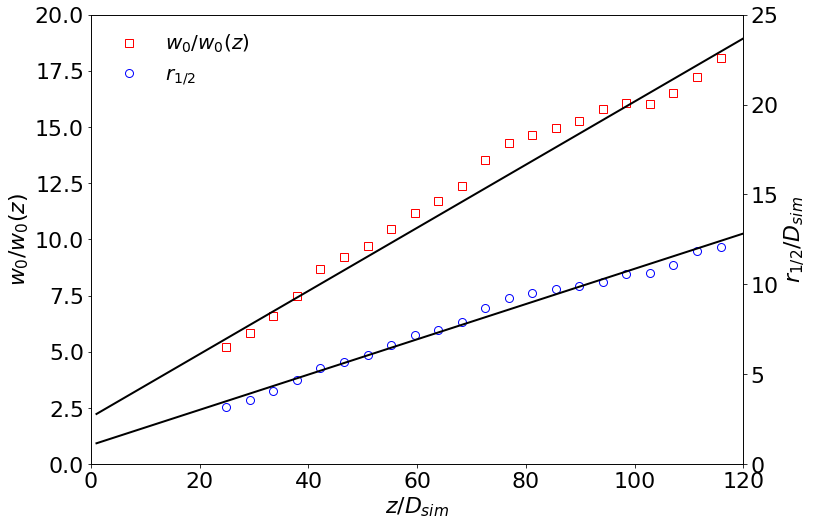

In [18]:

fig,ax = plt.subplots()
ax.plot(z[220:zps-20:4]/dj, w[0,zps]/w[0,220:zps-20:4],'s',ms=8,mec='r',mfc='w',linewidth = 2,label='$w_0/w_0(z)$')
ax.plot(x_fit,w_fit,'k')
#plt.plot(z[220:zps-1]/dj,C[0,zps-1]/C[0,220:zps-1],'ks',linewidth = 2)

ax.set_xlabel('$z/D_{sim}$')
ax.set_ylabel('$w_0/w_0(z)$')
ax.set_xlim([0,120])
ax.set_ylim([0,20])
ax.tick_params(axis='y',labelsize=22)
ax.tick_params(axis='x',labelsize=22)


ax1 = ax.twinx()

ax1.plot(z[220:zps-20:4]/dj, rh[220:zps-20:4]/dj,'o',ms=8,mec='b',mfc='w',linewidth = 2,label = '$r_{1/2}$')
ax1.plot(x_fit,r_fit,'k')
ax1.set_ylim([0,25])
ax1.set_ylabel('$r_{1/2}/D_{sim}$')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left",frameon=False)
plt.savefig("w_vel_inv_rh_ppt.pdf")


# fig,ax = plt.subplots()
# plt.plot(z[220:zps-20]/dj, rh[220:zps-20]/dj,'ks',linewidth = 2)
# plt.plot(x_fit,r_fit,'k')
# plt.xlabel('$z/D_{sim}$')
# plt.ylabel('$r_{1/2}/D_{sim}$')
# plt.xlim([0,120])
# plt.ylim([0,15])
# ax.tick_params(axis='y',labelsize=22)
# ax.tick_params(axis='x',labelsize=22)
# plt.savefig("r_half.pdf")


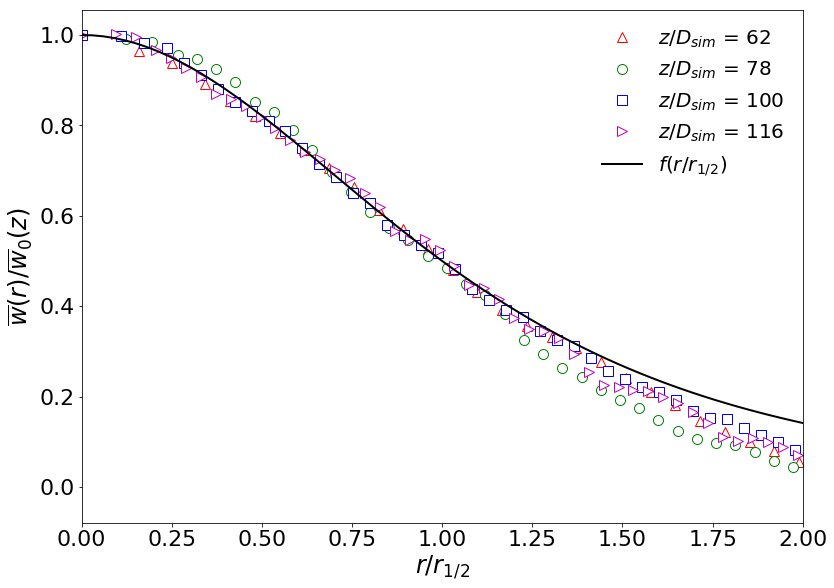

In [20]:
alpha = np.sqrt(41.4)
eta = np.linspace(0,0.3,100)
y = 1/(1+(alpha*(eta))**2)**(2)

fig,ax = plt.subplots()
#plt.plot(r/rh[290],w[:,290]/w[0,290],'o',ms=5,mec='g',mfc='g',label='$z/D_{sim}$ = %.0f' %(zd[290]))
plt.plot(r[0:-1:3]/rh[270],w[0:-1:3,270]/w[0,270],'^',ms=10,mec='r',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[270]))
plt.plot(r[0:-1:3]/rh[255],w[0:-1:3,255]/w[0,255],'o',ms=10,mec='g',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[255]))
plt.plot(r[0:-1:3]/rh[235],w[0:-1:3,235]/w[0,235],'s',ms=10,mec='b',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[235]))
plt.plot(r[0:-1:3]/rh[220],w[0:-1:3,220]/w[0,220],'>',ms=10,mec='m',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[220]))

plt.plot(eta/0.1,y,'k-',label = r'$f(r/r_{1/2})$')
plt.xlabel(r'$r/r_{1/2}$',fontdict=font)
plt.ylabel('$\overline{w}(r)/\overline{w}_0(z)$',fontdict=font)
plt.legend(frameon=False)
plt.xlim([0, 2])
ax.tick_params(axis='y',labelsize=22)
ax.tick_params(axis='x',labelsize=22)
plt.tight_layout()
plt.savefig('ss_w_vel_ppt.pdf')

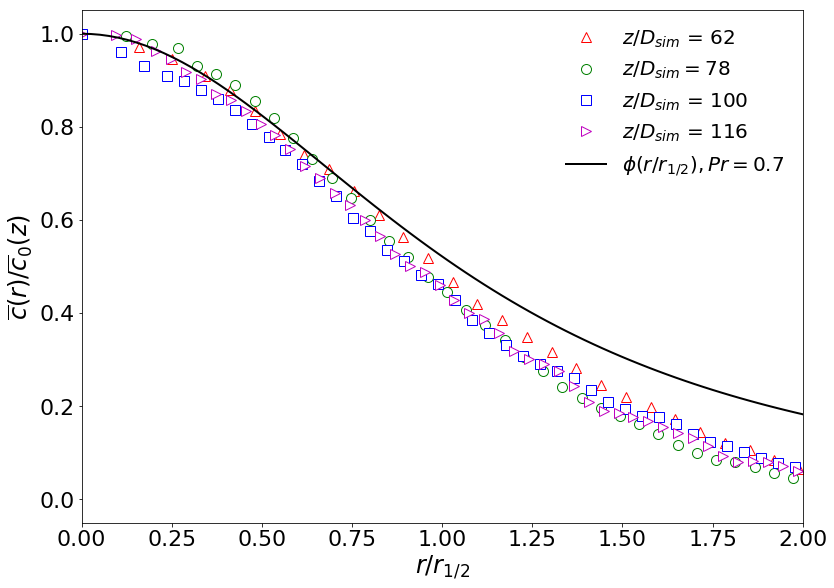

In [22]:
Pr = 0.7
y2 = 1/(1+(alpha*(eta))**2)**(2*Pr)
y3 = 1/(1+(alpha*(eta))**2)**(2*0.8)
fig,ax = plt.subplots()

#plt.plot(r/rh[290],C[:,290]/C[0,290],'o',ms=5,mec='g',mfc='g',label='$z/D_{sim}$ = %.0f' %(zd[290]))
plt.plot(r[0:-1:3]/rh[270],C[0:-1:3,270]/C[0,270],'^',ms=10,mec='r',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[270]))
plt.plot(r[0:-1:3]/rh[255],C[:-1:3,255]/C[0,255],'o',ms=10,mec='g',mfc='w',label='$z/D_{sim} = %.0f$' %(zd[255]))
plt.plot(r[0:-1:3]/rh[235],C[:-1:3,235]/C[0,235],'s',ms=10,mec='b',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[235]))
plt.plot(r[0:-1:3]/rh[220],C[:-1:3,220]/C[0,220],'>',ms=10,mec='m',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[220]))
plt.xlabel(r'$r/r_{1/2}$',fontdict=font)
plt.ylabel('$\overline{c}(r)/\overline{c}_0(z)$',fontdict=font)
plt.plot(eta/(0.1/Pr**0.5),y2,'k',label = r'$\phi(r/r_{1/2}), Pr = 0.7$')
plt.legend(frameon=False)
plt.xlim([0, 2])
ax.tick_params(axis='y',labelsize=22)
ax.tick_params(axis='x',labelsize=22)
plt.tight_layout()
plt.savefig('ss_c_ppt.pdf')

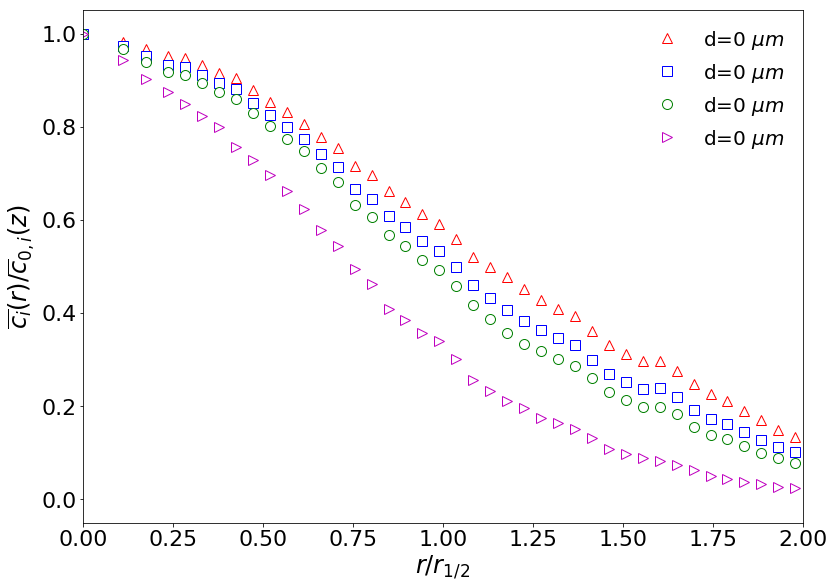

In [23]:
plt.figure()
plt.plot(r[0:-1:3]/rh[235],C1[0:-1:3,235]/C1[0,235],'^',ms=10,mec='r',mfc='w',label=r'd=%.0f $\mu m$' %(d[0]))
plt.plot(r[0:-1:3]/rh[235],C14[:-1:3,235]/C14[0,235],'s',ms=10,mec='b',mfc='w',label=r'd=%.0f $\mu m$' %(d[13]))
plt.plot(r[0:-1:3]/rh[235],C16[:-1:3,235]/C16[0,235],'o',ms=10,mec='g',mfc='w',label=r'd=%.0f $\mu m$' %(d[15]))
plt.plot(r[0:-1:3]/rh[235],C20[:-1:3,235]/C20[0,235],'>',ms=10,mec='m',mfc='w',label=r'd=%.0f $\mu m$' %(d[19]))
plt.legend(frameon=False)
plt.xlabel(r'$r/r_{1/2}$',fontdict=font)
plt.ylabel('$\overline{c_i}(r)/\overline{c}_{0,i}(z)$',fontdict=font)
plt.xlim([0, 2])
plt.tight_layout()
#plt.savefig('conc_diff_size_radial_zd235.pdf')

In [92]:
C_z_ode = sio.loadmat('cent_conc_3_5.mat')
z_ode = sio.loadmat('z.mat')
z_o = z_ode['x']
z_o = (z_o-z_o[0,122])/dj
C_ode = C_z_ode['output']

d32_we = sio.loadmat('d32_3_5_we_2we.mat')
d32_we_2we = d32_we['d32_out']
C_we = sio.loadmat('cent_conc_3_5_we.mat')
C_z_we = C_we['output_we']


0.0664733139980669

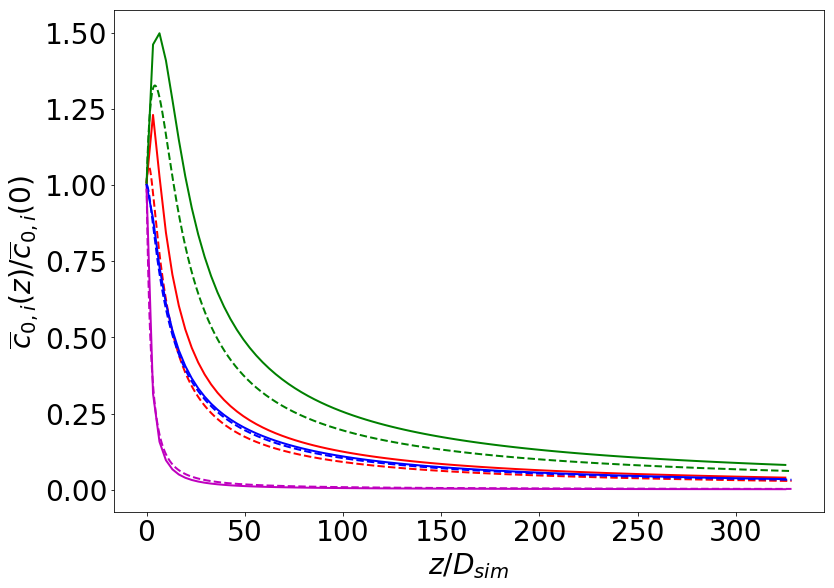

In [113]:
fig,ax = plt.subplots()
ax.plot((C_z_we[:,0]-C_z_we[0,0])/dj,d32_we_2we[:,0])
ax.plot(z_o[0,123:],d32_we_2we[123:,1])
fig.tight_layout()


fig,ax = plt.subplots()
ax.plot(z_o[0,123:],C_ode[123:,0]/(C_ode[123,0]),'r--')
ax.plot(z_o[0,123:],C_ode[123:,3]/(C_ode[123,3]),'m--')
ax.plot(z_o[0,123:],C_ode[123:,1]/(C_ode[123,1]),'g--')
ax.plot(z_o[0,123:],C_ode[123:,2]/(C_ode[123,2]),'b--')

ax.plot((C_z_we[1:-1:100,0]-C_z_we[0,0])/dj,C_z_we[1:-1:100,1]/(C_z_we[0,1]),'r-',ms=10,mfc='w')
ax.plot((C_z_we[1:-1:100,0]-C_z_we[0,0])/dj,C_z_we[1:-1:100,2]/(C_z_we[0,2]),'g-',ms=10,mfc='w')
ax.plot((C_z_we[1:-1:100,0]-C_z_we[0,0])/dj,C_z_we[1:-1:100,3]/(C_z_we[0,3]),'b-',ms=10,mfc='w')
ax.plot((C_z_we[1:-1:100,0]-C_z_we[0,0])/dj,C_z_we[1:-1:100,4]/(C_z_we[0,4]),'m-',ms=10,mfc='w')

ax.set_xlabel('$z/D_{sim}$')
ax.set_ylabel('$\overline{c}_{0,i}(z)/\overline{c}_{0,i}(0)$')
fig.tight_layout()
fig.savefig("C_diff_size_with_ode_we.pdf")

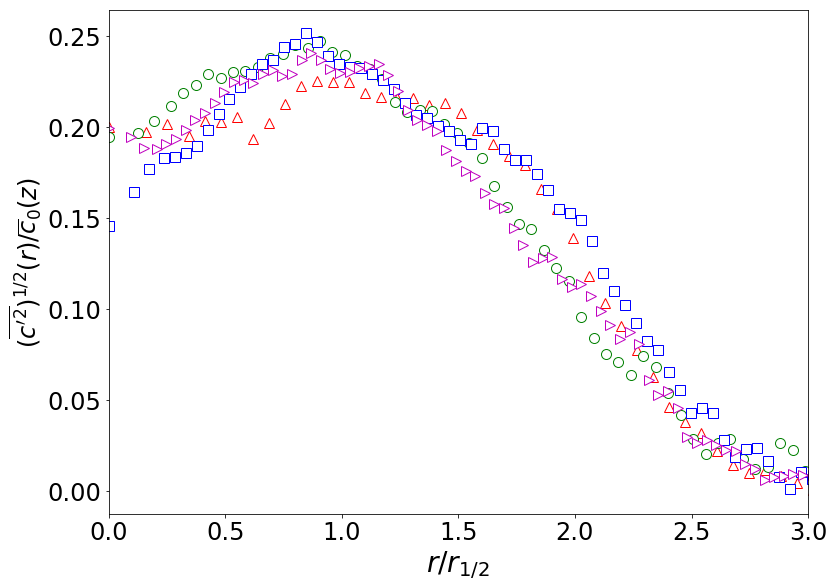

In [114]:
# plt.figure()
# plt.plot(z[220:zps]/dj,C1[0,zps+1]/C1[0,220:zps],'rs',linewidth = 2)
# plt.plot(z[220:zps]/dj,C8[0,zps+1]/C8[0,220:zps],'k<',linewidth = 2)
# plt.plot(z[220:zps]/dj,C14[0,zps+1]/C14[0,220:zps],'b--',linewidth = 2)
# #plt.plot(z[220:zps-1]/dj,C20[0,zps+1]/C20[0,220:zps-1],'ko',linewidth = 2)

# plt.xlabel('$z/D_{sim}$')
# plt.ylabel('$c_0/c_0(z)$')
#plt.savefig("C_inv.pdf")



fig,ax = plt.subplots()


plt.plot(z[zps-20:zps+1:2]/dj,C1[0,zps-20:zps+1:2]/C1[0,zps],'^',ms=10,mec='r',mfc='w',linewidth = 2)
plt.plot(z[220:zps-20:4]/dj, C1[0,220:zps-20:4]/C1[0,zps],'^',ms=10,mec='r',mfc='w',linewidth = 2)

plt.plot(z[zps-20:zps+1:2]/dj,C8[0,zps-20:zps+1:2]/C8[0,zps],'o',ms=10,mec='g',mfc='w',linewidth = 2)
plt.plot(z[220:zps-20:4]/dj,C8[0,220:zps-20:4]/C8[0,zps],'o',ms=10,mec='g',mfc='w',linewidth = 2)


plt.plot(z[zps-10:zps+1]/dj,C14[0,zps-10:zps+1]/C14[0,zps],'s',ms=10,mec='b',mfc='w',linewidth = 2)
plt.plot(z[220:zps-10:4]/dj,C14[0,220:zps-10:4]/C14[0,zps],'s',ms=10,mec='b',mfc='w',linewidth = 2)

plt.plot(z[zps-10:zps+1]/dj,C20[0,zps-10:zps+1]/C20[0,zps],'>',ms=10,mec='m',mfc='w',linewidth = 2)
plt.plot(z[220:zps-10:4]/dj,C20[0,220:zps-10:4]/C20[0,zps],'>',ms=10,mec='m',mfc='w',linewidth = 2)

plt.plot(z[220:zps+1]/dj,C[0,220:zps+1]/C[0,zps],'k--',linewidth = 2)
plt.plot(z_o[0,123:],C_ode[123:,0]/(C_ode[123,0]),'r--')
plt.plot(z_o[0,123:],C_ode[123:,3]/(C_ode[123,3]),'m--')
plt.plot(z_o[0,123:],C_ode[123:,1]/(C_ode[123,1]),'g--')
plt.plot(z_o[0,123:],C_ode[123:,2]/(C_ode[123,2]),'b--')

plt.xlabel('$z/D_{sim}$')
plt.ylabel('$\overline{c}_{0,i}(z)/\overline{c}_{0,i}(0)$')
plt.xlim([-1,120])
# axins = inset_axes(ax, width=3, height=3)
# axins.tick_params(left=True, right=False, labelleft=True, labelright=False)

left, bottom, width, height = [0.5, 0.5, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim([0,100])
ax2.set_xlabel('$z/D_{sim}$',fontsize=18)
ax2.set_ylabel('$\overline{c}_{0,i}/\overline{c}_{0,i}(z)$',fontsize=18)
ax2.plot(z[220:zps:5]/dj,C1[0,zps]/C1[0,220:zps:5],'^',ms=10,mec='r',mfc='w',linewidth = 2)
ax2.plot(z[220:zps:5]/dj,C8[0,zps]/C8[0,220:zps:5],'o',ms=10,mec='g',mfc='w',linewidth = 2)
ax2.plot(z[220:zps:5]/dj,C14[0,zps]/C14[0,220:zps:5],'s',ms=10,mec='b',mfc='w',linewidth = 2)
ax2.plot(z[220:zps:5]/dj,C20[0,zps]/C20[0,220:zps:5],'>',ms=10,mec='m',mfc='w',linewidth = 2)
ax2.plot(z[220:zps:5]/dj,C[0,zps]/C[0,220:zps:5],'k--',linewidth = 2)
ax2.tick_params(axis='y',labelsize=18)
ax2.tick_params(axis='x',labelsize=18)
plt.savefig("C_diff_size_with_ode.pdf")


fig,ax = plt.subplots()
plt.plot(r[0:-1:3]/rh[270],np.sqrt(C2[:-1:3,270]/C1[0,270]**2),'^',ms=10,mec='r',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[270]))
plt.plot(r[0:-1:3]/rh[255],np.sqrt(C2[:-1:3,255]/C1[0,255]**2),'o',ms=10,mec='g',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[255]))
plt.plot(r[0:-1:3]/rh[235],np.sqrt(C2[:-1:3,235]/C1[0,235]**2),'s',ms=10,mec='b',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[235]))
plt.plot(r[0:-1:3]/rh[220],np.sqrt(C2[:-1:3,220]/C1[0,220]**2),'>',ms=10,mec='m',mfc='w',label='$z/D_{sim}$ = %.0f' %(zd[220]))
plt.ylabel('$(\overline{c\'^2})^{1/2}(r)/\overline{c}_0(z)$',fontdict=font)
ax.set_xlabel(r'$r/r_{1/2}$')
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
#plt.legend(frameon=False)
ax.set_xlim([0,3])
fig.tight_layout()
plt.savefig("C2_rms1.pdf")
# fig,ax = plt.subplots()
# sample = [0,2,8,12,16,19]
# for ip in sample:#range(npcon):
#     c = np.load('C_'+str(ip+1)+'av.npy')
#     c2 = np.load('c2_rz_'+str(ip)+'.npy')
#     plt.plot(z[160:zps-20]/dj,np.sqrt(c2[0,160:zps-20]/c[0,zps]**2),linewidth = 2,label='P_'+str(ip+1))
# plt.ylabel('$(\overline{c\'^2})^{1/2}(r)/ \overline{c}_0(z)$',fontdict=font)
# ax.set_xlabel(r'$z/D_{sim}$')
# plt.legend(frameon=False,ncol=2)
# plt.savefig('c2_rmsz.pdf')

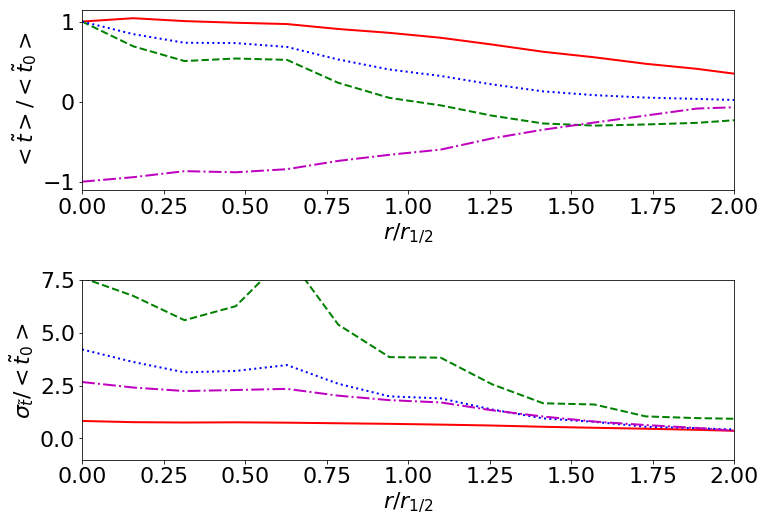

In [54]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'm']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))

s = np.random.randint(0,20,5)
sample = [0,7,13,19]
#sample.append(s)
r_2 = np.load("r_2.npy")
r_400 = np.load("r_400.npy")
r_200 = np.load("r_200.npy")


fig,(ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
jz = 235
for ip in sample:
    file_sig = 'sigmats_rz_2'+str(ip)+ '.npy'
    file_mu = 'muts_rz_2'+str(ip)+'.npy'
    mu_ts1 = np.load(file_mu)
    sigma_ts1 = np.load(file_sig)
    ax1.plot(r_2/rh[jz],(mu_ts1[:,jz])/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax2.plot(r_2/rh[jz],np.sqrt(sigma_ts1[:,jz]/159)/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax1.set_xlabel('$r/r_{1/2}$')
    ax2.set_xlabel(r'$r/r_{1/2}$')
    ax1.set_ylabel('$<\\tilde{t}>/<\\tilde{t}_0>$')
    ax2.set_ylabel('$\sigma_{\\tilde{t}}/<\\tilde{t}_0>$')
    ax2.set_xlim([0,2])
    ax1.set_xlim([0,2])
    ax2.set_ylim([-1,7.5])

In [ ]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'm','k']) +
                           cycler('linestyle', ['-', '--', ':', '-.', (0,(5,10))])))
fig,(ax1,ax2) = plt.subplots(2,1)
fig1,ax = plt.subplots()
fig.subplots_adjust(hspace=0.5)
sample = [0,7,13,18,19]
jz = 300
for ip in sample:
    file_sig = 'sigmats_rz_200_'+str(ip)+ '.npy'
    file_mu = 'muts_rz_200_'+str(ip)+'.npy'
    mu_ts1 = np.load(file_mu)
    sigma_ts1 = np.load(file_sig)
    ax1.plot(r_200/rh[jz],(mu_ts1[:,jz])/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax2.plot(r_200[:-1:1]/rh[jz],np.sqrt(sigma_ts1[:-1:1,jz]/158)/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax.plot(zd[175:zps+1],mu_ts1[0,175:zps+1])


ax1.set_xlabel(r'$r/r_{1/2}$')
ax1.set_ylabel('$\overline{\\tilde{f}_i}(r)/\overline{\\tilde{f}_i}(0)$')
ax1.set_xlim([0,2])
#ax1.set_ylim([-1.1,1.1])
ax2.set_xlabel(r'$r/r_{1/2}$')
ax2.set_ylabel('$\sigma_{\\tilde{f}_i}/\overline{\\tilde{f}_i}(0)$')
ax2.set_xlim([0,2])
#ax2.set_ylim([-0.05 ,8.5])

ax.set_xlim([0,30])
ax.set_ylabel('$\overline{\\tilde{f}_i}(z) (s^{-1})$')
ax.set_xlabel('$z/D_{sim}$')
ax.set_xlim([0,25])
ax.set_ylim([-80 ,100])
fig.tight_layout()
fig1.tight_layout()
fig1.savefig('mu_ts_z.pdf')
#fig.savefig('mu_sigma_ts200_z320.pdf')

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
jz = 300
for ip in sample:
    file_sig = 'sigmats_rz_400_'+str(ip)+ '.npy'
    file_mu = 'muts_rz_400_'+str(ip)+'.npy'
    mu_ts1 = np.load(file_mu)
    sigma_ts1 = np.load(file_sig)
    ax1.plot(r_400/rh[jz],(mu_ts1[:,jz])/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax2.plot(r_400/rh[jz],np.sqrt(sigma_ts1[:,jz]/158)/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax1.set_xlabel('$r/r_{1/2}$')
    ax2.set_xlabel(r'$r/r_{1/2}$')
    ax1.set_ylabel('$<\\tilde{t}>/<\\tilde{t}_0>$')
    ax2.set_ylabel('$\sigma_{\\tilde{t}}/<\\tilde{t}_0>$')
    ax2.set_xlim([0,2])
    ax1.set_xlim([0,2])
    ax2.set_xlim([0,2])
plt.tight_layout()

#plt.savefig('mu_sigma_ts400_z230.pdf')
                    

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
jz = 320
for ip in sample:
    file_sig = 'sigmats_rz_'+str(ip)+ '.npy'
    file_mu = 'muts_rz_'+str(ip)+'.npy'
    mu_ts1 = np.load(file_mu)
    sigma_ts1 = np.load(file_sig)
    ax1.plot(r/rh[jz],(mu_ts1[:,jz])/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax2.plot(r/rh[jz],np.sqrt(sigma_ts1[:,jz]/158)/np.abs(mu_ts1[0,jz]),label='ts_%d' %ip)
    ax1.set_xlabel('$r/r_{1/2}$')
    ax2.set_xlabel(r'$r/r_{1/2}$')
    ax1.set_ylabel('$overline{\\tilde{f}}_i/\overline{\\tilde{f}}_0$')
    ax2.set_ylabel('$\sigma_{\\tilde{f}_i}/\overline{\\tilde{f}}_0$')
    ax2.set_xlim([0,2])
    ax1.set_xlim([0,2])
    ax2.set_xlim([0,2])
plt.tight_layout()

fig.savefig('mu_sigma_ts76_z320.pdf')


In [ ]:
ip=18
file_sig = 'sigmats_rz_'+str(ip)+ '.npy'
file_mu = 'muts_rz_'+str(ip)+'.npy'
mu_ts1 = np.load(file_mu)
plt.figure()
plt.plot(zd[zps-10:zps+1],mu_ts1[0,zps-10:zps+1],'^',ms=10,mec='r',mfc='w',linewidth = 2)
plt.plot(zd[175:zps-10:3],mu_ts1[0,175:zps-10:3],'^',ms=10,mec='r',mfc='w',linewidth = 2)

In [ ]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'm']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
mu_ta = np.load("mutotar_rz_200.npy")
sigma_ta = np.load("sigmatotar_rz_200.npy")

sample = [270, 255, 235,220]

fig,(ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
for jz in sample:
    ax1.plot(r_200/rh[jz],mu_ta[:,jz]/mu_ta[0,jz],label='%.2f'%z[jz])
    ax2.plot(r_200/rh[jz],np.sqrt(sigma_ta[:,jz])/mu_ta[0,jz],label='%.2f'%zd[jz])
    ax1.set_ylabel(r'$\overline{\tilde{A}}(r)/\overline{\tilde{A}}(0)$')
    ax2.set_ylabel(r'$\sigma_\tilde{A}(r)/\overline{\tilde{A}}(0)$')
    ax1.set_xlabel(r'$r/r_{1/2}$')
    ax2.set_xlabel(r'$r/r_{1/2}$')
    ax1.set_xlim([0,2])
    ax2.set_xlim([0,2])
    ax1.set_ylim([-0.05,1.05])
#plt.legend()
plt.tight_layout()
#plt.savefig("mu_totar_sigma.pdf",dpi=300)


In [ ]:
plt.figure()
plt.plot(zd[180:zps+1],np.sqrt(sigma_ta[0,180:zps+1])/mu_ta[0,180:zps+1])
plt.show()

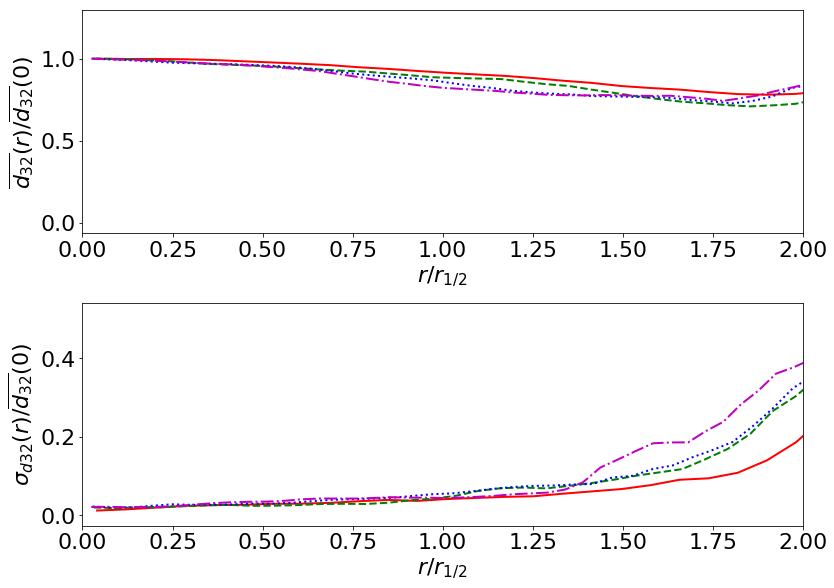

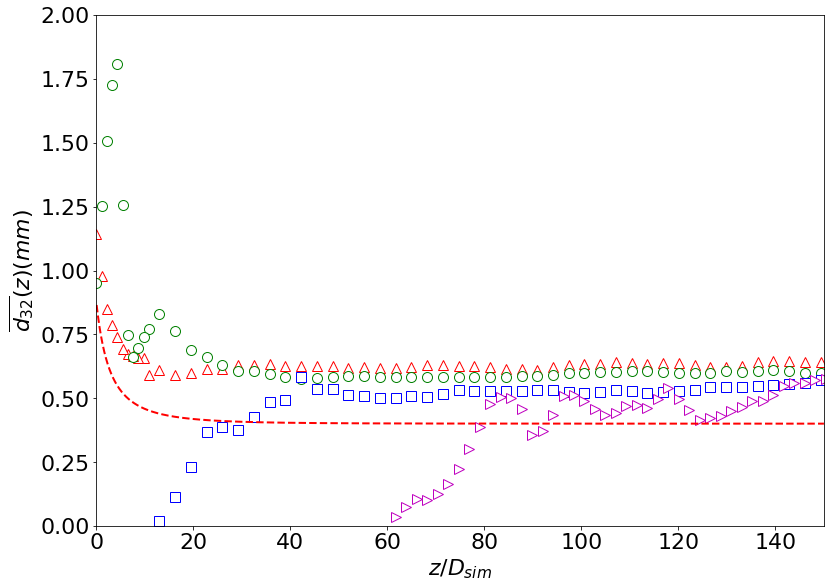

In [57]:
                    

mu_d32 = np.load("mud32_rz_200.npy")
sigma_d32 = np.load("sigmad32_rz_200.npy")

sample = [270, 255, 235,220]
fig,(ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
for jz in sample:
    ax1.plot(r_200/rh[jz],mu_d32[:,jz]/mu_d32[0,jz])
    ax2.plot(r_200/rh[jz],np.sqrt(sigma_d32[:,jz])/mu_d32[0,jz])
    ax1.set_ylabel(r'$\overline{d_{32}}(r)/\overline{d_{32}}(0)$')
    ax2.set_ylabel(r'$\sigma_{d32}(r)/\overline{d_{32}}(0)$')
    ax1.set_xlabel('$r/r_{1/2}$')
    ax2.set_xlabel(r'$r/r_{1/2}$')
    ax1.set_xlim([0,2])
    ax2.set_xlim([0,2])
  #  ax1.set_ylim([0.45,1.5])
plt.tight_layout()
#plt.savefig("mu_d32_sigma.pdf")
#plt.savefig("mu_d32_sigma_2.png",dpi=300)
mu_d32 = mu_d32*1000
plt.figure()
plt.plot(zd[zps-10:zps+1],mu_d32[0,zps-10:zps+1],'^',ms=10,mec='r',mfc='w',linewidth = 2)
plt.plot(zd[175:zps-10:3],mu_d32[0,175:zps-10:3],'^',ms=10,mec='r',mfc='w',linewidth = 2)
plt.plot(zd[zps-10:zps+1],mu_d32[10,zps-10:zps+1],'o',ms=10,mec='g',mfc='w',linewidth = 2)
plt.plot(zd[175:zps-10:3],mu_d32[10,175:zps-10:3],'o',ms=10,mec='g',mfc='w',linewidth = 2)
#plt.plot(zd[zps-10:zps+1],mu_d32[20,zps-10:zps+1],'s',ms=10,mec='b',mfc='w',linewidth = 2)
plt.plot(zd[175:zps-10:3],mu_d32[20,175:zps-10:3],'s',ms=10,mec='b',mfc='w',linewidth = 2)
#plt.plot(zd[zps-10:zps+1],mu_d32[40,zps-10:zps+1],'>',ms=10,mec='m',mfc='w',linewidth = 2)
plt.plot(zd[175:zps-55:2],mu_d32[40,175:zps-55:2],'>',ms=10,mec='m',mfc='w',linewidth = 2)
#plt.plot(z_o[0,123:],d32_ode[123:]*1000,'r--')
plt.ylim([0,2])
plt.xlim([0,150])
plt.ylabel(r'$\overline{d_{32}}(z) (mm)$')
plt.xlabel('$z/D_{sim}$')
plt.tight_layout()
#plt.savefig("d32_z.pdf")


In [ ]:
rh[320]

In [ ]:
d[7]

In [ ]:
zd[175]

In [ ]:
z[175]

In [ ]:
d[13]

In [ ]:
zd[zps-30]

In [ ]:
eps=np.load('mueps_rz.npy')
plt.plot(zd,-eps[0,:])
plt.xlim([-2,20])

In [ ]:
r_200/rh[320]

In [ ]:
zd[320]

In [ ]:
r_200[20]/dj

In [ ]:

d[18]

In [ ]:
ip=17

file_sig = 'sigmats_rz_200_'+str(ip)+ '.npy'
file_mu = 'muts_rz_200_'+str(ip)+'.npy'
mu_ts1 = np.load(file_mu)
sigma_ts1 = np.load(file_sig)
plt.figure()
plt.plot(zd[175:zps+1],mu_ts1[0,175:zps+1])
plt.xlim([0,25])

np.min(mu_ts1[0,175:zps+1])

In [ ]:
diff_1 = np.load('diff_1.npy')

In [ ]:
rise = np.loadtxt('vel_sintef.dat')

In [ ]:
data_folder = Path('./../')

fname_vel = data_folder / 'avg_velrms_342_500.out'
f = open(fname_vel,'rb')
temp = np.fromfile(f,'f8')
w2 = temp[2*recl:3*recl].reshape((nx,ny,nz),order='F')
d=d*1e6


In [ ]:
plt.figure()
plt.plot(zd[180:zps],(1+4*rise[0]**2/w2[143,143,180:zps])**(-0.5),label=r'd=%.0f $\mu m$' %(d[0]))
plt.plot(zd[180:zps],(1+4*rise[10]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[10]))
plt.plot(zd[180:zps],(1+4*rise[12]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$'  %(d[12]))
plt.plot(zd[180:zps],(1+4*rise[14]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[14]))
plt.plot(zd[180:zps],(1+4*rise[15]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[15]))
plt.plot(zd[180:zps],(1+4*rise[16]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[16]))
plt.plot(zd[180:zps],(1+4*rise[17]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[17]))
plt.plot(zd[180:zps],(1+4*rise[18]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[18]))
plt.plot(zd[180:zps],(1+4*rise[19]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[19]))
plt.legend(frameon=False)
plt.ylim([0,1.1])
plt.xlabel('$z/d_{sim}$')
plt.ylabel('$D_{p,T}/D_{f,T}$')
plt.tight_layout()
plt.savefig('trans_diffusion_coeff.png',dpi=300)

In [ ]:
d_20 = np.mean((1+4*rise[19]**2/w2[143,143,210:zps-40])**(-0.5))
print(d_20)

In [ ]:
plt.figure()
plt.plot(zd[180:zps],(1+rise[0]**2/w2[143,143,180:zps])**(-0.5),label=r'd=%.0f $\mu m$' %(d[0]))
plt.plot(zd[180:zps],(1+rise[10]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[10]))
plt.plot(zd[180:zps],(1+rise[12]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$'  %(d[12]))
plt.plot(zd[180:zps],(1+rise[14]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[14]))
plt.plot(zd[180:zps],(1+rise[15]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[15]))
plt.plot(zd[180:zps],(1+rise[16]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[16]))
plt.plot(zd[180:zps],(1+rise[17]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[17]))
plt.plot(zd[180:zps],(1+rise[18]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[18]))
plt.plot(zd[180:zps],(1+rise[19]**2/w2[143,143,180:zps])**(-0.5),label='d=%.0f $\mu m$' %(d[19]))
plt.legend(frameon=False)
plt.ylim([0,1.1])
plt.xlabel('$z/d_{sim}$')
plt.ylabel('$D_{p,L}/D_{f,L}$')
plt.tight_layout()
plt.savefig('long_diffusion_coeff.png',dpi=300)

In [ ]:
ratio = np.zeros(npcon)
for ip in range(npcon):
    ratio[ip] = np.sqrt(w2[143,143,253])/rise[ip]

In [ ]:
plt.figure()
plt.plot(np.sqrt(w2[144,144,180:zps])/rise[14], (1+rise[0]**2/w2[143,143,180:zps])**(-0.5)/np.sqrt(w2[143,143,180:zps])/(0.7*rh[180:zps]))

In [ ]:
S = list(values)
diff_p = []
S_p = []
alpha2 = (np.sqrt(2)-1)/S[1]**2
for ip in range(npcon):
    diff_p.append(np.mean((1+4*rise[ip]**2/w2[143,143,190])**(-0.5)))
    S_p.append(np.sqrt((np.exp(np.log(2)*diff_p[ip]/2)-1)/alpha2))
    

In [ ]:
fig,ax = plt.subplots()
ax.semilogx(d, values,'o',ms=5,mec='g',mfc='g',label='$S_{r_{1/2}}$')
ax.semilogx(d,S_p,'s',ms=8,mec='b',mfc='none',label = '$S_{D_{p,TT}}$')
ax.set_ylim([0,.12])
ax.set_xlabel('d $(\mu m)$')
ax.set_ylabel('Jet spread rate')
ax.legend(frameon=False)
fig.savefig('spread_rate_2.pdf')

In [ ]:
zd[190]

In [ ]:
dtdf_d1 = (1+rise**2/w2[143,143,220])**(-0.5)
dtdf_d = (1+rise**2/w2[143,143,190])**(-0.5)

In [ ]:
gig,ax = plt.subplots()
ax.semilogx(d, dtdf_d,'o',ms=5,mec='g',mfc='g')
#ax.semilogx(d, dtdf_d1,'s',ms=5,mec='b',mfc='none')

ax.set_ylim([0,1.1])
ax.set_ylabel('$D_{p,T}/D_{f,T}$')
ax.set_xlabel('d $(\mu m)$')
gig.savefig('Dt_v_d.pdf')

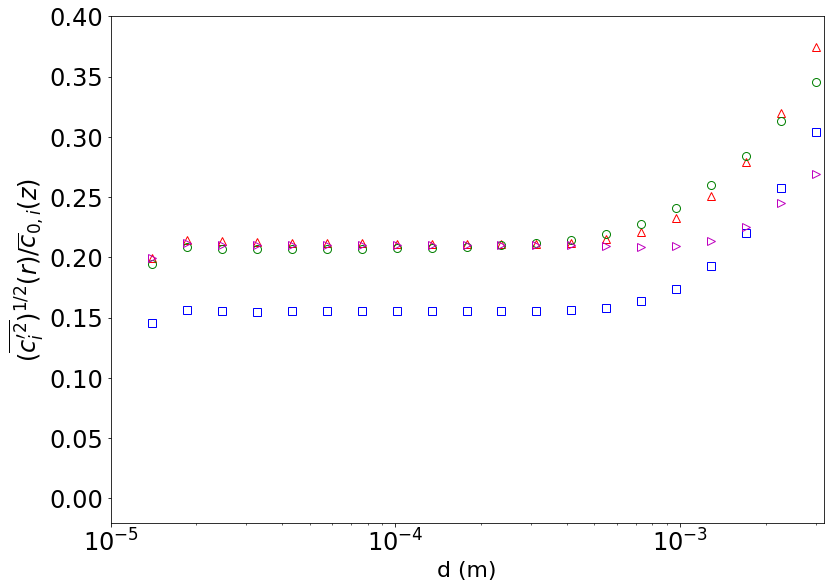

In [49]:
fig,ax = plt.subplots()
err = []
for ip in range(npcon):
    C2 = np.load('c2_rz_' + str(ip) + '.npy')
    C = np.load('C_'+str(ip+1)+'av.npy')
    err.append(np.sqrt(C2[0,255]/C[0,255]**2))
    ax.semilogx(d[ip],np.sqrt(C2[0,270]/C[0,270]**2),'^',ms=8,mec='r',mfc='none')
    ax.semilogx(d[ip],np.sqrt(C2[0,255]/C[0,255]**2),'o',ms=8,mec='g',mfc='none')
    ax.semilogx(d[ip],np.sqrt(C2[0,235]/C[0,235]**2),'s',ms=8,mec='b',mfc='none')
    ax.semilogx(d[ip],np.sqrt(C2[0,220]/C[0,220]**2),'>',ms=8,mec='m',mfc='none')
ax.set_xlabel('d (m)')
ax.set_ylabel('$(\overline{c_i\'^2})^{1/2}(r)/\overline{c}_{0,i}(z)$',fontdict=font)
ax.set_ylim([-0.02,0.4])
ax.set_xlim([10e-6,3.2e-3])
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
fig.tight_layout()
fig.savefig('c2rmsvsd.pdf')